In [19]:
# !pip install Image
# !pip install matplotlib
# !pip install pyautogui 

!pip install opencv-python
!pip install opencv-contrib-python

     ---------------------------------------- 38.2/38.2 MB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 44.9/44.9 MB 5.7 MB/s eta 0:00:00


# 한장씩 자르기

In [21]:
import cv2

# 영상의 의미지를 연속적으로 캡쳐할 수 있게 하는 class
# 영상이 있는 경로
vidcap = cv2.VideoCapture('./a.mp4')

count = 0
try:
    while(vidcap.isOpened()):
        ret, image = vidcap.read()
        # 이미지 사이즈 960x540으로 변경     16 : 9
        image = cv2.resize(image, (1920, 1080))  

        # n 프레임당 하나씩 이미지 추출
        if(int(vidcap.get(1)) % 1 == 0):
            # print('Saved frame number : ' + str(int(vidcap.get(1))))
            # 추출된 이미지가 저장되는 경로
            cv2.imwrite("./a/a%d.png" % count, image)
            count += 1

except:
    print ('finish') 
    vidcap.release()

finish


# 도트로 바꾸기

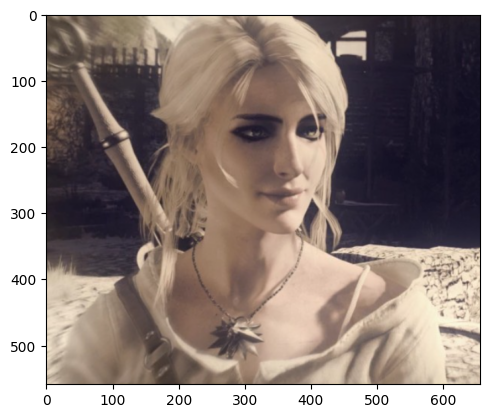

In [12]:
from PIL import Image
import matplotlib.pylab as plt 
r = Image.open('C:/Users/maili/Desktop/1.png') 
plt.imshow(r)
plt.show()

In [8]:
m_size = 1  # 모자이크 크기 10
x_m = r.size[0] % m_size
y_m = r.size[1] % m_size
x_p = m_size - x_m
y_p = m_size - y_m
r_new = Image.new(r.mode, (r.size[0]+x_p, r.size[1]+y_p),(255,255,255))
r_new.paste(r, (0,0))
r = r_new # 모자이크 크기 기준으로 딱 나눠 떨어지도록 그림 수정

In [9]:
r.size

(659, 561)

In [10]:
for i in range(0, r.size[0],m_size):
    for j in range(0, r.size[1],m_size):
        r_sum = 0
        g_sum = 0
        b_sum = 0
        for ii in range(i, i+m_size):
            for jj in range(j, j+m_size):
                rgb = r.getpixel((ii,jj))
                r_sum += rgb[0]
                g_sum += rgb[1]
                b_sum += rgb[2]
        r_a = round(r_sum/m_size**2) # rgb 평균 구하기
        g_a = round(g_sum/m_size**2)
        b_a = round(b_sum/m_size**2)
        ##### 이 사이에 코드 추가 #####
        for ii in range(i, i+m_size):
            for jj in range(j, j+m_size):
                r.putpixel((ii,jj),(r_a,g_a,b_a)) # rgb 평균 구해서 색깔 집어 넣기


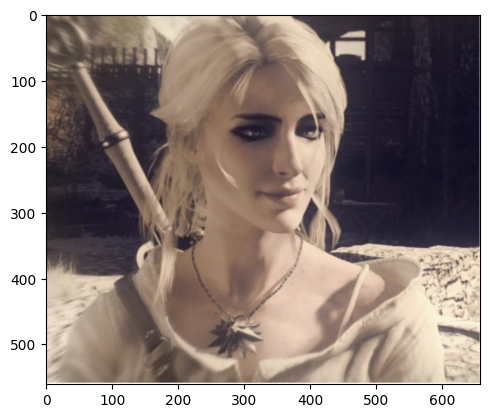

In [11]:
plt.imshow(r)
plt.show()

In [24]:
import pyautogui as pag # pyautogui 모듈 pag 라는 별명으로 들고옴
from PIL import ImageGrab # 화면 캡쳐를 하기 위한 모듈 들고옴
c_list = [] # 색깔 후보군 저장할 리스트

In [45]:
pos = pag.position() # pos라는 변수에 마우스 커서 위치 좌표 저장
screen = ImageGrab.grab() # screen에 화면 캡쳐한 이미지 저장
color = screen.getpixel(pos) # screen 이미지에 마우스 커서 위치에서의 RGB값 추출

c_list.append(color) # 뽑은 RGB값 c_list에 추가
print(c_list) # 실행할 때마다 c_list에 rgb값 잘 들어오는지 확인

[(247, 247, 247), (134, 101, 84), (239, 212, 190), (31, 27, 45), (227, 196, 176), (217, 188, 168), (87, 75, 72), (159, 127, 104), (119, 92, 87), (232, 204, 182), (156, 133, 113), (182, 152, 130), (140, 108, 87), (33, 29, 42), (49, 44, 52), (157, 139, 117)]


In [21]:
c_list = [(247, 247, 247), (52, 53, 58), (73, 81, 90), (114, 118, 122)]

In [46]:
r_a, g_a, b_a = (234,134,20)

In [47]:
rgb_point = []
for c in c_list: # c_list에서 요소 뽑아서
    rgb_point.append(abs(r_a-c[0])+abs(g_a-c[1])+abs(b_a-c[2])) # 위에서 구한 평균값과 차이 계산하여 rgb_point에 추가
print(rgb_point)

[353, 197, 253, 335, 225, 219, 258, 166, 224, 234, 172, 180, 187, 328, 307, 179]


In [48]:
min_rgb = min(rgb_point) # rgb_point에서 가장 작은 값 min_rgb에 저장
min_rgb_ind = rgb_point.index(min_rgb) # rgb_point에서 min_rgb의 위치 추출하여 min_rgb_ind에 저장
r_f, g_f, b_f = c_list[min_rgb_ind] # c_list에서 min_rgb_ind에 해당하는 위치 인덱싱하여 rgb값 최종 선정!

In [49]:
for i in range(0, r.size[0],m_size):
    for j in range(0, r.size[1],m_size):
        r_sum = 0
        g_sum = 0
        b_sum = 0
        for ii in range(i, i+m_size):
            for jj in range(j, j+m_size):
                rgb = r.getpixel((ii,jj))
                r_sum += rgb[0]
                g_sum += rgb[1]
                b_sum += rgb[2]
        r_a = round(r_sum/m_size**2)
        g_a = round(g_sum/m_size**2)
        b_a = round(b_sum/m_size**2) # 여기까지 모자이크
        rgb_point = []
        for c in c_list:
            rgb_point.append(abs(r_a-c[0])+abs(g_a-c[1])+abs(b_a-c[2]))
        min_rgb = min(rgb_point)
        min_rgb_ind = rgb_point.index(min_rgb)
        r_f, g_f, b_f = c_list[min_rgb_ind] # 색깔 선정
        for ii in range(i, i+m_size):
            for jj in range(j, j+m_size):
                r.putpixel((ii,jj),(r_f,g_f,b_f)) # 색깔 칠하기

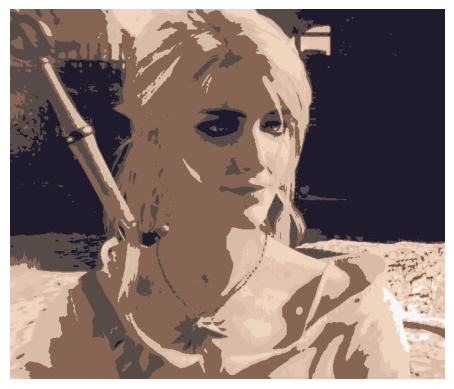

In [50]:
plt.imshow(r)
plt.axis('off')
plt.show()

In [163]:
r.save("./a1/a1.png")

In [129]:

plt.tight_layout()
plt.savefig('./a1/1.jpg')


    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")
        plt.tight_layout()
        plt.savefig(f'./save{name}')


IndentationError: unexpected indent (1701690160.py, line 5)

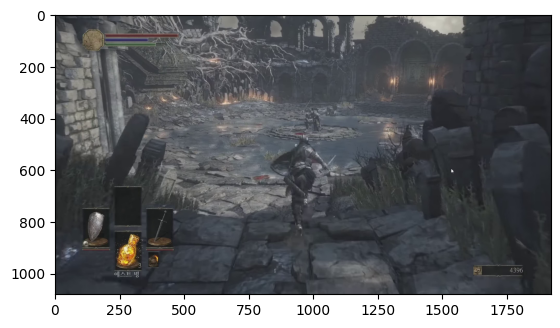

In [90]:
from PIL import Image
import matplotlib.pylab as plt 
r = Image.open('./a/a2.png') 

plt.imshow(r)
plt.show()





KeyboardInterrupt: 

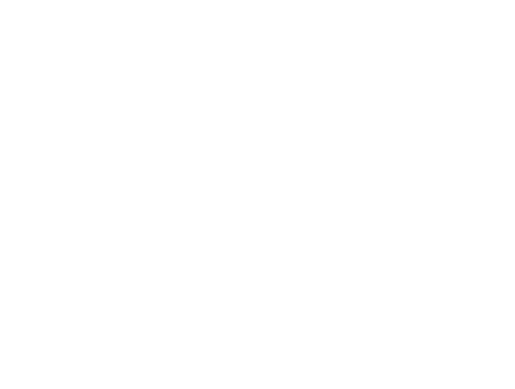

In [30]:
import os
import pyautogui as pag # pyautogui 모듈 pag 라는 별명으로 들고옴
from PIL import ImageGrab # 화면 캡쳐를 하기 위한 모듈 들고옴
from PIL import Image
import matplotlib.pylab as plt 


def dot(InputDic , InputImage , OutputDic , OutputImage ):
    input = InputDic+InputImage
    r = Image.open(input) 
    m_size = 1  # 모자이크 크기 10
    x_m = r.size[0] % m_size
    y_m = r.size[1] % m_size
    x_p = m_size - x_m
    y_p = m_size - y_m
    r_new = Image.new(r.mode, (r.size[0]+x_p, r.size[1]+y_p),(255,255,255))
    r_new.paste(r, (0,0))
    r = r_new # 모자이크 크기 기준으로 딱 나눠 떨어지도록 그림 수정

    for i in range(0, r.size[0],m_size):
        for j in range(0, r.size[1],m_size):
            r_sum = 0
            g_sum = 0
            b_sum = 0
            for ii in range(i, i+m_size):
                for jj in range(j, j+m_size):
                    rgb = r.getpixel((ii,jj))
                    r_sum += rgb[0]
                    g_sum += rgb[1]
                    b_sum += rgb[2]
            r_a = round(r_sum/m_size**2) # rgb 평균 구하기
            g_a = round(g_sum/m_size**2)
            b_a = round(b_sum/m_size**2)
            ##### 이 사이에 코드 추가 #####
            for ii in range(i, i+m_size):
                for jj in range(j, j+m_size):
                    r.putpixel((ii,jj),(r_a,g_a,b_a)) # rgb 평균 구해서 색깔 집어 넣기

                    
    c_list = [(247, 247, 247), (52, 53, 58), (73, 81, 90), (114, 118, 122)]
    r_a, g_a, b_a = (234,134,20)

    rgb_point = []
    for c in c_list: # c_list에서 요소 뽑아서
        rgb_point.append(abs(r_a-c[0])+abs(g_a-c[1])+abs(b_a-c[2])) # 위에서 구한 평균값과 차이 계산하여 rgb_point에 추가

    min_rgb = min(rgb_point) # rgb_point에서 가장 작은 값 min_rgb에 저장
    min_rgb_ind = rgb_point.index(min_rgb) # rgb_point에서 min_rgb의 위치 추출하여 min_rgb_ind에 저장
    r_f, g_f, b_f = c_list[min_rgb_ind] # c_list에서 min_rgb_ind에 해당하는 위치 인덱싱하여 rgb값 최종 선정!


    for i in range(0, r.size[0],m_size):
        for j in range(0, r.size[1],m_size):
            r_sum = 0
            g_sum = 0
            b_sum = 0
            for ii in range(i, i+m_size):
                for jj in range(j, j+m_size):
                    rgb = r.getpixel((ii,jj))
                    r_sum += rgb[0]
                    g_sum += rgb[1]
                    b_sum += rgb[2]
            r_a = round(r_sum/m_size**2)
            g_a = round(g_sum/m_size**2)
            b_a = round(b_sum/m_size**2) # 여기까지 모자이크
            rgb_point = []
            for c in c_list:
                rgb_point.append(abs(r_a-c[0])+abs(g_a-c[1])+abs(b_a-c[2]))
            min_rgb = min(rgb_point)
            min_rgb_ind = rgb_point.index(min_rgb)
            r_f, g_f, b_f = c_list[min_rgb_ind] # 색깔 선정
            for ii in range(i, i+m_size):
                for jj in range(j, j+m_size):
                    r.putpixel((ii,jj),(r_f,g_f,b_f)) # 색깔 칠하기
                
    plt.axis('off')
    output =  OutputDic + OutputImage
    r.save(output)

    
    
    
    

for i in range(len(os.listdir("./a/"))):
    dot("./a/" ,f"a{i}.png" ,"./a1/", f"a{i}.png")
    


In [ ]:
''' 

import cv2
import numpy as np
import glob
 
img_array = []
for filename in glob.glob('C:/Users/경로를/변경하세요/*.png'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('저장할 파일이름.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()


'''